# Ferromagnetic Hysterisis

## Introduction

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [102]:
data_folder = Path("data")

## Read data

In [103]:
muestras = []
for file in data_folder.iterdir():
		if file.suffix == ".txt":
			muestras.append(pd.read_csv(file, sep="\t", header=1, names=["Current", "Flux"], decimal=","))

In [107]:
# Process samples
def extract_sample(samples, i, n=3):
	sample = pd.concat(samples[n*i:n*(i+1)], axis=1)
	sample["Avg Current"] = sample["Current"].mean(axis=1)
	sample["Std Current"] = sample["Current"].std(axis=1)
	sample["Avg Flux"] = sample["Flux"].mean(axis=1)
	sample["Std Flux"] = sample["Flux"].std(axis=1)
	sample.drop(columns=["Current", "Flux"], inplace=True)

	return sample

In [108]:
sample1 = extract_sample(muestras, 0)
sample2 = extract_sample(muestras, 1)
sample3 = extract_sample(muestras, 2)

## Results

R1 and R2

In [40]:
def plot_sample(x, y, x_err, y_err, line_params, points_params, figsize=(10, 6), title="Sample", x_label="Current [A]", y_label="Flux [Vs]", save=False, save_name="Figures/Sample"):

	fig, ax = plt.subplots(figsize=figsize)

	sns.set_context("talk", font_scale=1.1)

	plt.errorbar(x, y, xerr=x_err, yerr=y_err, **points_params)
	plt.plot(x, y, **line_params)
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	if points_params["label"] is not None:
		plt.legend()
	plt.title(title)
	plt.grid()
	plt.show()

	if save:
		plt.savefig(save_name + ".png")

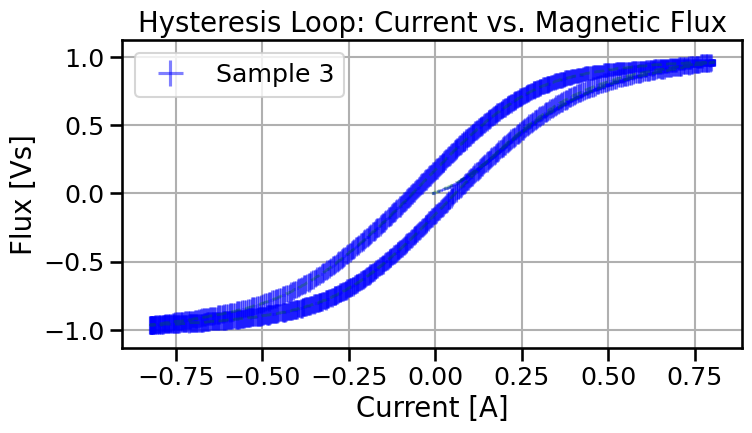

In [53]:
line_params = {
	"color":"green", 
	"linestyle":"--",
	"linewidth":2, 
	"alpha":0.3,
	}

point_params = {
	"color":"blue", 
	"fmt":"None",
	"markersize":6, 
	"alpha":0.5,
	"label":"Sample 3",
}
sample = sample3
x = sample["Avg Current"]
x_err = sample["Std Current"]
y = sample["Avg Flux"]
y_err = sample["Std Flux"]
title = "Hysteresis Loop: Current vs. Magnetic Flux"

plot_sample(x, y, x_err, y_err, line_params, point_params, save=False, figsize=(8, 4), title=title)

## Results 3 and 4

In [110]:
N = 500
L = 0.44 
S = 0.04*0.04

In [111]:
# H calculation

sample1["H"] = sample1["Avg Current"] * N / L 
sample1["H Error"] = sample1["Std Current"] * N / L

sample2["H"] = sample2["Avg Current"] * N / L
sample2["H Error"] = sample2["Std Current"] * N / L

sample3["H"] = sample3["Avg Current"] * N / L
sample3["H Error"] = sample3["Std Current"] * N / L

In [112]:
# B Calculation

sample1["B"] = sample1["Avg Flux"] / (N*S)
sample1["B Error"] = sample1["Std Flux"] / (N*S)

sample2["B"] = sample2["Avg Flux"] / (N*S)
sample2["B Error"] = sample2["Std Flux"] / (N*S)

sample3["B"] = sample3["Avg Flux"] / (N*S)
sample3["B Error"] = sample3["Std Flux"] / (N*S)

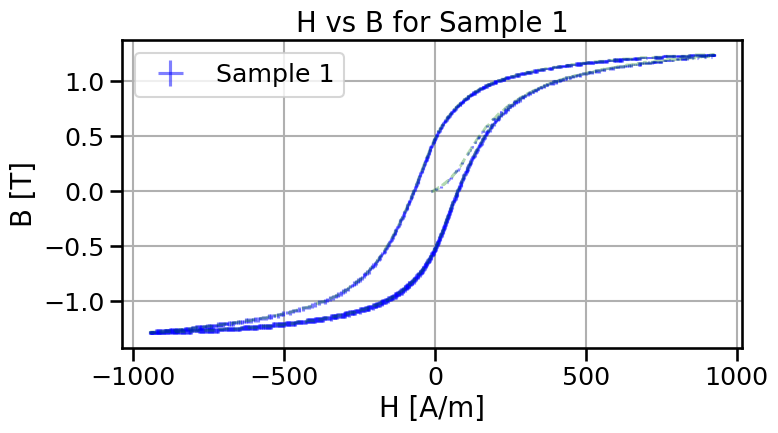

<Figure size 640x480 with 0 Axes>

In [57]:
line_params = {
	"color":"green", 
	"linestyle":"--",
	"linewidth":2, 
	"alpha":0.3,
	}

point_params = {
	"color":"blue", 
	"fmt":"None",
	"markersize":6, 
	"alpha":0.5,
	"label":"Sample 1",
}

sample = sample1
x = sample["H"]
x_err = sample["H Error"]
y = sample["B"]
y_err = sample["B Error"]

x_label = "H [A/m]"
y_label = "B [T]"
title = "H vs B for Sample 1"

plot_sample(x, y, x_err, y_err, line_params, point_params, save=True, save_name="Figures/HvB_sample1", figsize=(8, 4), x_label=x_label, y_label=y_label, title=title)

In [114]:
tol = 1e-2
sample = sample1

H_zeros = sample[(sample["B"].abs() < tol)]["H"]
H_zeros = H_zeros[H_zeros <-40]
H_zeros

print(f"Media = {H_zeros.mean()}")
print(f"Error = {H_zeros.std()}")

tol = 1.5
B_zeros = sample[sample["H"].abs() < tol][["B", "B Error"]]
B_zeros = B_zeros[B_zeros > 0.05]

B_zeros

Media = -70.07575757575756
Error = 1.0713739108887086


,B,B Error
11,NaN,NaN
12,NaN,NaN
546,0.483333,NaN
547,0.470833,NaN
1052,NaN,NaN


In [118]:
sample1[["B", "B Error", "H", "H Error"]]

,B,B Error,H,H Error
0,0.000,0.0,-11.363636,0.00000
1,0.000,0.0,-10.984848,0.65608
2,0.000,0.0,-10.227273,0.00000
3,0.000,0.0,-8.712121,0.65608
4,0.000,0.0,-8.712121,0.65608
...,...,...,...,...
1245,1.225,0.0,900.378788,0.65608
1246,1.225,0.0,904.924242,0.65608
1247,1.225,0.0,908.333333,0.65608
1248,1.225,0.0,912.500000,0.00000


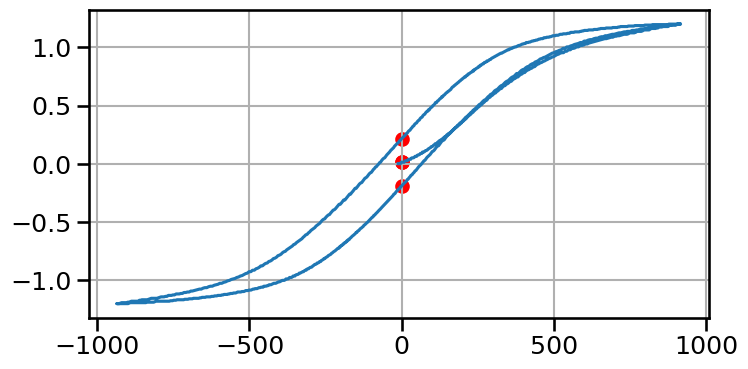

In [94]:
plt.figure(figsize=(8, 4))
plt.plot(sample["H"], sample["B"], label="Sample 1")
plt.scatter(np.zeros_like(B_zeros), B_zeros, color="red", label="H = 0")
plt.grid()